# 3.Convolutional Neural Networks

## 3.2Keras Tutorial - The Happy House(not garded)

In [7]:
import numpy as np 
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [8]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes = load_dataset()

In [9]:
X_train = X_train_orig/255
X_test = X_test_orig/255

In [10]:
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

In [11]:
print("number of training examples = " + str(X_train.shape[0]))
print("number of test example = " + str(X_test.shape[0]))
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

number of training examples = 600
number of test example = 150
X_train shape:(600, 64, 64, 3)
Y_train shape:(600, 1)
X_test shape:(150, 64, 64, 3)
Y_test shape:(150, 1)


In [12]:
def model(input_shape):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D((3,3))(X_input)
    
    X = Conv2D(32,(7,7),strides = (1,1),name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((2,2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1,activation = 'sigmoid', name = 'fc')(X)
    
    model = Model(inputs = X_input, outputs = X, name='Happymodel')
    
    return model

In [14]:
def HappyModel(input_shape):
    X_input = Input(input_shape)
    
    X = ZeroPadding2D(padding=(1,1))(X_input)
    X = Conv2D(8,kernel_size = (3,3),strides = (1,1),name = 'conv1')(X)
    X = BatchNormalization(axis = 3,name ='bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2,2),strides = (2,2),name='max_pool1')(X)
    
    X = ZeroPadding2D(padding = (1,1))(X_input)
    X = Conv2D(16,kernel_size =(3,3),strides=(1,1),name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size = (2,2),strides=(2,2),name='max_pool2')(X)
                      
    X = ZeroPadding2D(padding=(1,1))(X_input)
    X = Conv2D(32,kernel_size = (3,3), strides=(1,1),name = 'conv3')(X)
    X = BatchNormalization(axis =3,name='bn3')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D(pool_size = (2,2),strides=(2,2),name='max_pool3')(X)
    
    X = Flatten()(X)
    X = Dense(1,activation='sigmoid',name='fc')(X)
                      
    model = Model(inputs = X_input,outputs = X, name='HappyModel')
                      
    return model

In [15]:
happyModel = HappyModel((64,64,3))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
import keras
happyModel.compile(optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0), loss ="binary_crossentropy", metrics = ["accuracy"])

In [17]:
happyModel.fit(x = X_train, y = Y_train, epochs = 20, batch_size = 16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
600/600 [==============================] - 8s 13ms/step - loss: 1.2840 - acc: 0.6950
Epoch 2/20
600/600 [==============================] - 7s 11ms/step - loss: 0.1867 - acc: 0.9150
Epoch 3/20
600/600 [==============================] - 7s 11ms/step - loss: 0.1150 - acc: 0.9567
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0832 - acc: 0.9683
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.1789 - acc: 0.9383
Epoch 6/20
600/600 [==============================] - 7s 12ms/step - loss: 0.2569 - acc: 0.9100
Epoch 7/20
600/600 [==============================] - 7s 12ms/step - loss: 0.1093 - acc: 0.9717
Epoch 8/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0838 - acc: 0.9650
Epoch 9/20
600/600 [==============================] - 8s 13ms/step - loss: 0.0910 - acc: 0.9783
Epoch 10/20
600/600 [==============================] - 7s 12ms/step - loss: 0.0395 - acc

In [18]:
preds = happyModel.evaluate(x=X_test, y=Y_test)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 5ms/step

Loss = 0.2237874178091685
Test Accuracy = 0.940000003973643


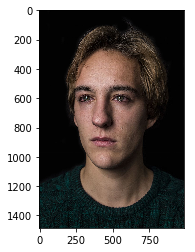

In [68]:
img_path = './picture/test07.jpg'
img1 = image.load_img(img_path)
imshow(img1)
img = image.load_img(img_path,target_size=(64,64))

In [69]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [70]:
ishappy = happyModel.predict(x)[0][0]
if ishappy:
    print("Happy")
else:
    print("Not Happy")        

Happy


In [28]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 66, 66, 3)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 64, 64, 32)        896       
_________________________________________________________________
bn3 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool3 (MaxPooling2D)     (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
__________

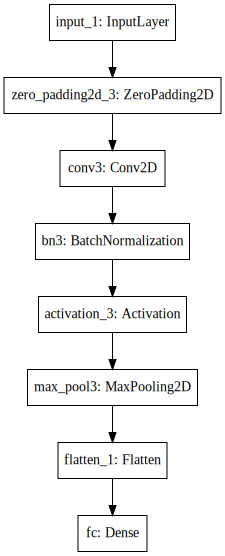

In [29]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))